1.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from scipy import stats


/var/folders/8q/_2fpqc5j70b5k8r5kydwm3800000gn/T/ipykernel_21238/478234604.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
import seaborn as sns

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn. pipeline import Pipeline

In [9]:
kidney = pd.read_csv("/Users/jolena/Desktop/kidney_disease.csv")

In [11]:
kidney = kidney.drop("id",axis=1)

In [12]:
kidney.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [13]:
kidney.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

2.

In [23]:
kidney

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [24]:
float_col = kidney.select_dtypes(include=['float64']).columns
object_col = kidney.select_dtypes(include=['object']).columns
#Divide the dataset into two categories one is "float64" and one is "object".

In [30]:
mappings = {
    'rbc': {'normal': 1, 'abnormal': 0},
    'pc': {'normal': 1, 'abnormal': 0},
    'pcc': {'present': 1, 'notpresent': 0},
    'ba': {'present': 1, 'notpresent': 0},
    'htn': {'yes': 1, 'no': 0},
    'dm': {'yes': 1, 'no': 0},
    'cad': {'yes': 1, 'no': 0},
    'pe': {'yes': 1, 'no': 0},
    'ane': {'yes': 1, 'no': 0},
    'appet': {'good': 1, 'poor': 0},

}

In [31]:
for column, mapping in mappings.items():
    kidney[column] = kidney[column].replace(mapping)

In [32]:
scale = StandardScaler()
kidney[float_col] = scale.fit_transform(kidney[float_col])

3.

In [35]:
kidney.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,htn,appet,pe,ane
count,3.910000e+02,3.880000e+02,3.530000e+02,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,3.560000e+02,3.810000e+02,383.000000,3.130000e+02,3.120000e+02,3.480000e+02,398.000000,399.000000,399.000000,399.000000
mean,9.994847e-17,-2.380684e-16,2.415443e-15,0.000000,0.000000,0.810484,0.773134,0.106061,0.055556,-1.796316e-16,-3.729883e-17,0.000000,2.270105e-17,-7.970832e-17,4.083579e-17,0.369347,0.794486,0.190476,0.150376
std,1.001281e+00,1.001291e+00,1.001419e+00,1.001415,1.001428,0.392711,0.419431,0.308305,0.229351,1.001407e+00,1.001315e+00,1.001308,1.001601e+00,1.001606e+00,1.001440e+00,0.483235,0.404584,0.393170,0.357888
min,-2.885708e+00,-1.936857e+00,-2.173584e+00,-0.752868,-0.410106,0.000000,0.000000,0.000000,0.000000,-1.591967e+00,-1.108830e+00,-0.466102,-1.280094e+01,-6.671023e-01,-3.241109e+00,0.000000,0.000000,0.000000,0.000000
25%,-5.530393e-01,-4.733701e-01,-1.297699e+00,-0.752868,-0.410106,1.000000,1.000000,0.000000,0.000000,-6.193803e-01,-6.032459e-01,-0.378897,-2.433340e-01,-2.594231e-01,-7.655198e-01,0.000000,1.000000,0.000000,0.000000
50%,2.050779e-01,2.583733e-01,4.540705e-01,-0.752868,-0.410106,1.000000,1.000000,0.000000,0.000000,-3.414983e-01,-3.058433e-01,-0.309133,4.534651e-02,-7.126345e-02,4.248496e-02,0.000000,1.000000,0.000000,0.000000
75%,7.590867e-01,2.583733e-01,4.540705e-01,0.727772,-0.410106,1.000000,1.000000,0.000000,0.000000,1.890038e-01,1.700008e-01,-0.047519,4.302539e-01,8.553625e-02,8.504897e-01,1.000000,1.000000,0.000000,0.000000
max,2.246163e+00,7.575807e+00,1.329955e+00,2.948733,4.145186,1.000000,1.000000,1.000000,1.000000,4.319341e+00,6.613723e+00,12.719271,2.451017e+00,1.328807e+01,1.813219e+00,1.000000,1.000000,1.000000,1.000000


4.

<Axes: >

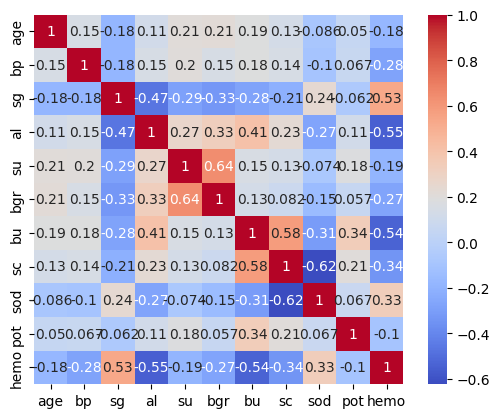

In [36]:
df_float = Kidney[float_col]
df_float = df_float.apply(lambda x: x.fillna(x.mean()), axis=0)

co_matrix = df_float.corr()
co_matrix

sns.heatmap(co_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)

5.

In [37]:
missing = kidney.isnull().sum()
missing
kidney_clean = kidney.dropna()
kidney_num = kidney_clean[float_col]

6.

In [38]:
z_scores = np.abs(stats.zscore(kidney_num))
outlier = np.where(z_scores > 3)
outlier
df_nooutlier =kidney_clean[(z_scores < 3).all(axis=1)]
outlier

(array([ 0,  1,  2,  6, 12, 18, 18, 19, 23, 23, 26, 31, 33, 34, 34, 36, 36,
        38, 38, 39, 40, 40, 40, 41, 41, 42, 42, 42]),
 array([ 8,  8,  5,  4,  7,  4,  9,  6,  6,  7,  8,  7,  7,  4,  7,  4,  5,
         7,  8,  4,  1,  6,  7,  4,  5,  6,  7, 10]))

7.

In [39]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis

In [40]:
x = kidney_clean.drop('classification',axis=1)

In [41]:
pca_x = PCA()
pca_load = pd.DataFrame(pca_x.fit(x).components_.T, index=x .columns)
pca_load

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
age,0.000044,0.020727,0.313500,-0.185826,-0.701004,-0.513627,0.273301,0.140848,-0.036657,0.058009,...,-0.004501,0.005891,0.072952,0.056216,-0.001775,-0.000031,-7.392093e-03,-0.000283,-0.004997,-0.013964
bp,0.000002,0.035400,0.067652,0.046718,0.025120,0.407139,0.825058,-0.102388,-0.318178,-0.095240,...,-0.048738,0.064591,0.027206,-0.064673,0.021877,-0.062808,1.287280e-02,0.044848,-0.002837,-0.028386
sg,-0.000089,-0.069240,-0.349792,0.214633,-0.150371,0.007661,0.210613,-0.233942,0.372096,0.710201,...,-0.094894,-0.018434,0.099751,0.015594,0.013670,0.056837,3.999720e-02,-0.014557,0.020821,0.051542
al,0.000105,0.086506,0.354798,-0.053853,0.245396,0.024628,0.049722,0.366635,-0.004227,0.258650,...,0.186120,-0.034904,0.028970,-0.091987,0.092482,0.028324,-3.124977e-02,0.130183,-0.102601,0.017576
su,0.000048,0.031270,0.400688,0.079648,-0.122333,0.389188,-0.105558,-0.128379,0.213501,0.154699,...,0.028203,0.016616,0.047583,0.293827,0.052177,-0.109216,-1.282485e-01,0.023675,-0.036312,-0.023774
rbc,-0.000011,-0.015295,-0.084867,0.066915,-0.038577,-0.061664,-0.031825,-0.004106,0.030667,0.057753,...,-0.034594,0.343663,-0.012850,-0.696004,0.013198,-0.122331,1.271279e-01,0.128402,0.031432,-0.366889
pc,-0.000021,-0.031640,-0.083082,0.031712,-0.086061,0.050781,0.054878,-0.019013,0.036327,-0.056850,...,0.560321,-0.010241,0.024108,-0.246467,0.362295,0.507457,-9.504404e-03,-0.175262,-0.191054,0.320121
pcc,0.000013,0.016963,0.014968,-0.055576,0.046849,-0.010613,-0.009634,0.006357,-0.105535,0.080766,...,-0.429113,0.342571,-0.105319,-0.006576,0.013106,0.246891,-5.961398e-01,-0.206342,-0.049116,0.263687
ba,0.000014,0.011158,0.054319,-0.037182,0.024958,0.065924,-0.045905,0.035100,-0.091148,-0.050776,...,-0.344878,-0.082938,0.414898,0.058157,0.108969,0.322578,4.658541e-01,-0.488863,0.168440,-0.123985
bgr,0.000056,0.038115,0.443833,-0.095012,-0.201793,0.385907,-0.198867,-0.168903,0.207283,0.043672,...,0.057824,0.143680,0.106218,-0.203356,-0.088188,0.009185,1.095654e-01,0.008531,0.039788,0.040300


In [42]:
pc_score = pd.DataFrame(pca_x.fit_transform(x), index=x.index)
pc_score

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
3,-1775.937410,12.277046,0.531766,-1.898433,1.606408,-0.467304,-0.989909,1.926934,-1.682763,0.521791,...,0.159883,0.929139,-0.439554,-0.045305,-0.204214,-0.266805,-0.004653,0.155941,0.054602,0.245320
9,3624.062410,9.510131,-0.930548,-0.411131,1.170972,-0.595923,1.413588,0.403137,-0.530532,1.438227,...,-0.542576,-0.020200,-0.525777,0.808045,-0.102422,0.081002,-0.467015,-0.629513,-0.211007,-0.269306
11,-3975.936184,14.552231,1.909266,-1.708721,-0.669518,0.490025,-1.551092,0.242885,-0.408185,0.135829,...,-0.231872,0.827651,0.022348,-0.380794,-0.071166,0.056142,-0.319929,-0.011892,0.060346,0.446355
14,2524.076808,23.743046,-0.438817,-0.121706,-1.087686,0.015895,-0.771560,-0.255492,-0.784187,0.328447,...,-0.847077,0.190483,0.037954,0.040243,0.470340,0.512131,-0.049698,0.274732,0.308311,-0.110322
20,724.069302,17.572271,-0.506429,-0.386704,-0.123167,-0.798790,0.173911,-0.608048,0.306640,-0.143327,...,-0.473666,0.046594,-0.695794,0.467278,0.182941,0.060976,0.762369,0.411019,-0.341455,0.323852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1775.953785,-3.305705,0.422959,0.065001,-0.493713,-0.044379,0.425593,-0.643332,-0.145772,-0.745943,...,0.015576,0.193601,0.006698,-0.086394,0.116852,-0.108326,0.032648,0.037897,-0.087687,0.007741
396,-675.961775,-11.542973,0.312832,-0.026240,0.646350,-0.042683,0.355971,0.448940,0.387876,0.187914,...,-0.182079,0.058023,-0.142936,0.108226,-0.096713,0.063378,-0.020013,-0.089322,0.012249,-0.041708
397,-1875.955914,-5.251541,-0.331084,0.261720,1.673644,1.213478,-0.126453,-0.051150,-0.496399,-0.258788,...,-0.003141,0.025829,-0.161402,-0.143512,0.021252,-0.050210,0.021839,0.035580,0.011277,-0.033874
398,-1275.958300,-7.864024,-0.082125,0.452053,1.734872,0.316668,-0.801596,0.284339,0.713136,0.496484,...,-0.082729,-0.026519,-0.055032,-0.061082,0.070570,0.065391,0.070651,-0.040942,0.082958,0.076491


In [43]:
pc_score[0]

3     -1775.937410
9      3624.062410
11    -3975.936184
14     2524.076808
20      724.069302
          ...     
395   -1775.953785
396    -675.961775
397   -1875.955914
398   -1275.958300
399   -1675.960104
Name: 0, Length: 158, dtype: float64

In [44]:
k_means = KMeans(n_clusters=2, n_init=20, random_state=0)
k_means.fit(x)
k_means.labels_

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)

In [45]:
pd.Series(k_means.labels_).value_counts()

0    143
1     15
Name: count, dtype: int64

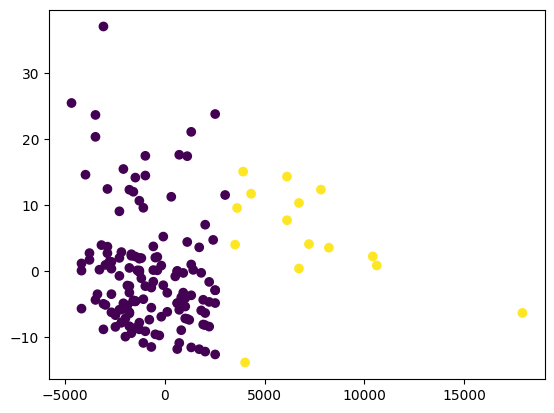

In [46]:
plt.scatter(pc_score[0], pc_score[1], c=k_means.labels_)

8.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(
    kidney_clean.drop('classification', axis=1),
    kidney_clean['classification'],
    test_size=0.3,
    random_state=1
)

9.

Random Forest: Offers high accuracy through ensemble learning, can handle various data types, and provides feature importance which is useful for interpretation in medical datasets.
K-Nearest Neighbors (KNN): Simple and effective for small datasets, requires no model assumptions, and can quickly adapt to new data, which is advantageous in dynamic medical environments.

10.

 Accuracy: This is a measure of the number of correct predictions made by the model divided by the total number of predictions. It's a general indicator of a model's performance.
F1 Score: The F1 score is the harmonic mean of precision and recall, providing a balance between the two. It is particularly useful when the class distribution is uneven, as it accounts for both false positives and false negatives.
Accuracy= Total Number of Predictions/Number of Correct Predictions = (TP+TN+FP+FN)/(TP+TN)
F1 Score=2× (Precision+Recall)/Precision×Recall
Precision= (TP+FP)/TP​
Recall= (TP+FN)/TP
where TP is True Positives, TN is True Negatives, FP is False Positives, and FN is False Negatives.

11.

With Random Forest, we can utilize the built-in feature importance to identify which features contribute most to the prediction. For KNN, feature selection is crucial because it relies on distance measurements; irrelevant features can disrupt its performance. Techniques like Sequential Feature Selector or using correlation metrics can be helpful.

12.

Logistic Regression: Accuracy of 97.5% and F1 Score of 0.975
K-Nearest Neighbors: Accuracy of 81.67% and F1 Score of 0.818
Random Forest: Accuracy of 100% and F1 Score of 1.0
The Random Forest classifier has achieved perfect scores on the test set, which suggests excellent performance. However, this could also be a sign of overfitting, and further investigation such as cross-validation would be recommended to confirm these results. The Logistic Regression also performed very well, with high accuracy and F1 score. The K-Nearest Neighbors classifier showed lower performance compared to the other two.

13.

The feature importances from the Random Forest classifier are as follows for the top five features:
a. Hemoglobin (hemo): 11.59% importance
b. Serum Creatinine (sc): 10.36% importance
c. Specific Gravity (sg): 8.71% importance
d. Albumin (al): 7.69% importance
e. Hypertension No (htn_no): 7.65% importance
These features are the most influential in predicting kidney disease according to the Random Forest model. Hemoglobin level is the most significant predictor, followed closely by serum creatinine, which is a waste product in the blood that kidneys filter out. Specific gravity is a measure related to urine concentration, and albumin is a protein that can be present in the urine and can indicate kidney health. The presence or absence of hypertensionl also plays a significant role in the model's predictions. 